# Quick Analysis of Kial's May 1-degree runs

In [1]:
# Load modules
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large',
          'figure.facecolor':'white',
          'axes.facecolor':'white',
          'savefig.facecolor':'white'}
pylab.rcParams.update(params)
import xarray as xr
import numpy as np
import IPython.display
import cartopy.crs as ccrs
import cosima_cookbook as cc

from tqdm import tqdm_notebook
from joblib import Memory

memory = Memory(cachedir='/g/data1/v45/cosima-cookbook/', verbose=0)


Populating the interactive namespace from numpy and matplotlib
netcdf_index loaded.


In [2]:
cc.start_cluster(diagnostics_port=8787)

If the link to the dashboard below doesn't work, run this command on a local terminal to set up a SSH tunnel:

  ssh -N -L 8787:127.0.0.1:8787 vdi-n8.nci.org.au -l rmh561


Client Scheduler: tcp://127.0.0.1:46736 Dashboard: http://127.0.0.1:8787,Cluster Workers: 4 Cores: 8 Memory: 24.00 GB


HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=33), HTML(value='')))

/home/561/rmh561/cosima-cookbook/cosima_cookbook/netcdf_index.py:382: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  decoded_time = xr.conventions.decode_cf_datetime(dataarray.time, time_units)


HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=34), HTML(value='')))

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=22), HTML(value='')))

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=19), HTML(value='')))

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=9), HTML(value='')))

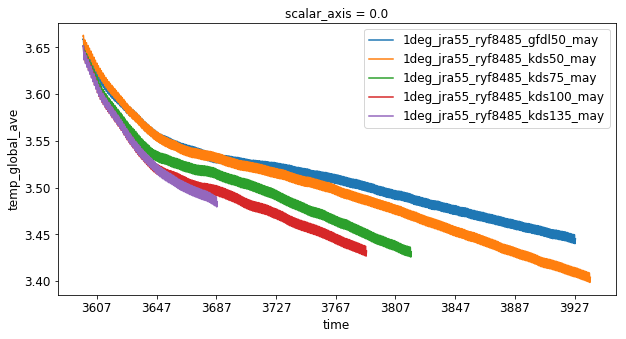

In [4]:
# Plot Global Average Temperature Time Series:
f = plt.figure(figsize=(10,5))
f.set_facecolor('white')
esub = ['1deg_jra55_ryf8485_gfdl50_may',
'1deg_jra55_ryf8485_kds50_may',
'1deg_jra55_ryf8485_kds75_may',
'1deg_jra55_ryf8485_kds100_may',
'1deg_jra55_ryf8485_kds135_may',
   ]
variable = 'temp_global_ave'
for ii in range(len(esub)):
    darray = cc.get_nc_variable(esub[ii],'ocean_scalar.nc',variable,time_units='days since 1700-01-01')
    darray.plot(label=esub[ii])
plt.legend()
    

In [5]:
@memory.cache
def calc_psi_avg(expt, n=4):
    psi = cc.get_nc_variable(expt, 'ocean.nc', 'ty_trans_rho',
                             chunks={'potrho': None},
                             n=n)

    psi = psi.sum('grid_xt_ocean').cumsum('potrho')
    psi_avg = psi.mean('time')
    
    #psi_avg = psi_avg.compute()
    psi_avg = cc.compute_by_block(psi_avg)
    
    return psi_avg

def plot_psi(psi_avg, expt, clev=np.arange(-20,20,2)):

    plt.contourf(psi_avg.grid_yu_ocean, 
                 psi_avg.potrho, 
                 psi_avg, 
                 cmap=plt.cm.PiYG,levels=clev,extend='both')
    cb=plt.colorbar(orientation='vertical', shrink = 0.7)
    cb.ax.set_xlabel('Sv')
    plt.contour(psi_avg.grid_yu_ocean, 
                psi_avg.potrho, 
                psi_avg, levels=clev, colors='k', linewidths=0.25)
    plt.contour(psi_avg.grid_yu_ocean,
                psi_avg.potrho, psi_avg,
                levels=[0.0,], colors='k', linewidths=0.5)
    plt.gca().invert_yaxis()
    
    plt.ylim((1037.5,1034))
    plt.ylabel('Potential Density (kg m$^{-3}$)')
    plt.xlabel('Latitude ($^\circ$N)')
    plt.xlim([-75,85])
    plt.title('Overturning in %s' % expt)

In [6]:
expt = '1deg_jra55_ryf8485_gfdl50_may'
psi_avg = calc_psi_avg(expt)

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=4), HTML(value='')))

/home/561/rmh561/cosima-cookbook/cosima_cookbook/netcdf_index.py:382: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  decoded_time = xr.conventions.decode_cf_datetime(dataarray.time, time_units)


HBox(children=(IntProgress(value=0, max=3), HTML(value='')))

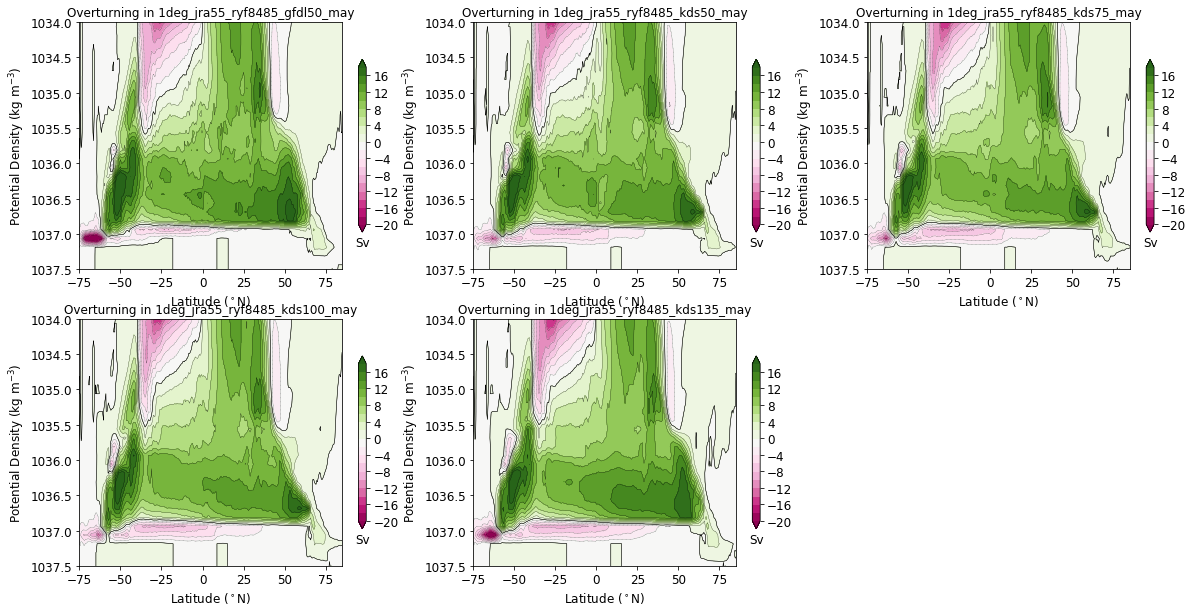

In [17]:
expts = ['1deg_jra55_ryf8485_gfdl50_may',
'1deg_jra55_ryf8485_kds50_may',
'1deg_jra55_ryf8485_kds75_may',
'1deg_jra55_ryf8485_kds100_may',
'1deg_jra55_ryf8485_kds135_may',
   ]

f = plt.figure(figsize=(20,10))
f.set_facecolor('white')
for n, expt in enumerate(expts): 
    plt.subplot(2,3,n+1)
    psi_avg = calc_psi_avg(expt)
    plot_psi(psi_avg/1.e9, expt)

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=61), HTML(value='')))

/home/561/rmh561/cosima-cookbook/cosima_cookbook/netcdf_index.py:382: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  decoded_time = xr.conventions.decode_cf_datetime(dataarray.time, time_units)


HBox(children=(IntProgress(value=0, description='get_nc_variable:'), HTML(value='')))

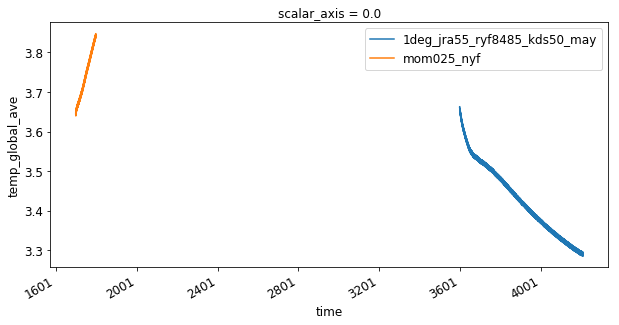

In [7]:
# Plot Global Average Temperature Time Series for a few different runs:
f = plt.figure(figsize=(10,5))
f.set_facecolor('white')
esub = ['1deg_jra55_ryf8485_kds50_may',
        'mom025_nyf'
   ]
variable = 'temp_global_ave'
for ii in range(len(esub)):
    darray = cc.get_nc_variable(esub[ii],'ocean_scalar.nc',variable,time_units='days since 1700-01-01')
    darray.plot(label=esub[ii])
plt.legend()

In [4]:
cc.get_configurations()

['mom01v5',
 'APE-MOM',
 'access-om2',
 'mom025',
 'mom-sis',
 'access-om2-025',
 'access-om2-01',
 'woa13',
 'kds75_wp2']

In [6]:
cc.get_experiments('access-om2-025')

['mom025_jra_ryf0304',
 'mom025_jra_ryf8485',
 'mom025_jra_ryf9091',
 'mom025_jra_ryf9091_saltunderice',
 'mom025_nyf',
 'mom025_nyf_salt']